<a href="https://colab.research.google.com/github/Lanssser/inf2178-experimentaldesign-w24/blob/main/Assignment4/MINGLI_WANG_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# INF2178 Assignment 4
# Name: Mingli Wang
# Student#: 1003100716
# Date: APR 5, 2024

#Setup

In [40]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%pip install bioinfokit
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from google.colab import files
from scipy.stats import ttest_ind
from scipy.stats import shapiro, levene
%pip install pingouin
import pingouin as pg

In [41]:
#Please upload INF2178_A4_data.xlsx dataset from your local disk.
uploaded = files.upload()

Saving INF2178_A4_data.csv to INF2178_A4_data (1).csv


In [42]:
#Read and load raw data
data = pd.read_csv('INF2178_A4_data.csv', na_values = '..')
data.head(20)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


#Data Wrangling and EDA

In [43]:
# A summary overview of the data to check for missing values
summary = {
    "Total Rows": len(data),
    "Total Columns": len(data.columns),
    "Data Types": data.dtypes.to_dict(),
    "Missing Values": data.isnull().sum(),
    "Unique Values": data.nunique().to_dict(),
}

summary_df = pd.DataFrame.from_dict(summary, orient='index')
summary_df.columns = ['Value']
summary_df

,Value
Total Rows,294
Total Columns,16
Data Types,"{'Unnamed: 0': int64, 'Subject ID': object, 'M..."
Missing Values,Unnamed: 0 0 Subject ID 0 MRI ID ...
Unique Values,"{'Unnamed: 0': 294, 'Subject ID': 150, 'MRI ID..."


In [44]:
# Replace missing values is SES and MMSE with medians
ses_median = data['SES'].median()
mmse_median = data['MMSE'].median()

data['SES'].fillna(ses_median, inplace=True)
data['MMSE'].fillna(mmse_median, inplace=True)

# Check if there are any missing values left
print(data.isnull().sum())

Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


In [45]:
# Remove the non-numeric prefix and convert the result to integers
data['Subject ID Integer'] = data['Subject ID'].str.replace('OAS2_', '').astype(int)
data[['Subject ID', 'Subject ID Integer']]

,Subject ID,Subject ID Integer
0,OAS2_0001,1
1,OAS2_0001,1
2,OAS2_0002,2
3,OAS2_0002,2
4,OAS2_0004,4
...,...,...
289,OAS2_0184,184
290,OAS2_0185,185
291,OAS2_0185,185
292,OAS2_0186,186


In [46]:
# Basic data shape and missing values
shape_info = data.shape
missing_values = data.isnull().sum().round(decimals=2)

# Summary statistics
summary_statistics = data.describe().round(decimals=2)

shape_info, missing_values, summary_statistics

((294, 17),
 Unnamed: 0            0
 Subject ID            0
 MRI ID                0
 Group                 0
 Visit                 0
 MR Delay              0
 M/F                   0
 Hand                  0
 Age                   0
 EDUC                  0
 SES                   0
 MMSE                  0
 CDR                   0
 eTIV                  0
 nWBV                  0
 ASF                   0
 Subject ID Integer    0
 dtype: int64,
        Unnamed: 0   Visit  MR Delay     Age    EDUC     SES    MMSE     CDR  \
 count      294.00  294.00    294.00  294.00  294.00  294.00  294.00  294.00   
 mean       190.42    1.49    349.79   76.41   14.56    2.47   27.27    0.30   
 std        106.69    0.50    400.74    7.61    2.88    1.10    3.41    0.38   
 min          0.00    1.00      0.00   60.00    6.00    1.00   15.00    0.00   
 25%         99.00    1.00      0.00   71.00   12.00    2.00   26.00    0.00   
 50%        195.50    1.00      0.00   76.00   14.50    2.00   29.00

In [47]:
numeric_summary = data[['Visit', 'MR Delay', 'Age', 'eTIV', 'nWBV']].describe().round(2)

# Getting value counts for the 'Group' column separately
group_counts = data['Group'].value_counts().round(2)

numeric_summary, group_counts

(        Visit  MR Delay     Age     eTIV    nWBV
 count  294.00    294.00  294.00   294.00  294.00
 mean     1.49    349.79   76.41  1478.85    0.73
 std      0.50    400.74    7.61   176.56    0.04
 min      1.00      0.00   60.00  1106.00    0.65
 25%      1.00      0.00   71.00  1347.25    0.70
 50%      1.00      0.00   76.00  1461.50    0.73
 75%      2.00    671.50   81.00  1569.00    0.76
 max      2.00   1707.00   98.00  2004.00    0.84,
 Group
 Nondemented    142
 Demented       126
 Converted       26
 Name: count, dtype: int64)

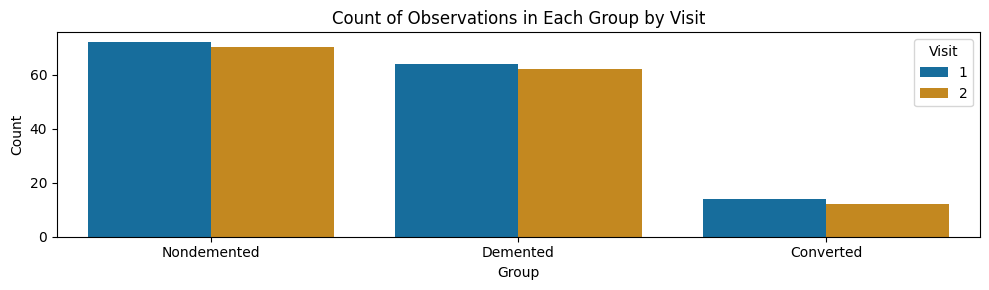

In [48]:
# Visualize the count of each group by visit
plt.figure(figsize=(10, 3))

sns.countplot(x='Group', hue='Visit', data=data, palette="colorblind")

plt.title('Count of Observations in Each Group by Visit')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Visit')

plt.tight_layout()
plt.show()

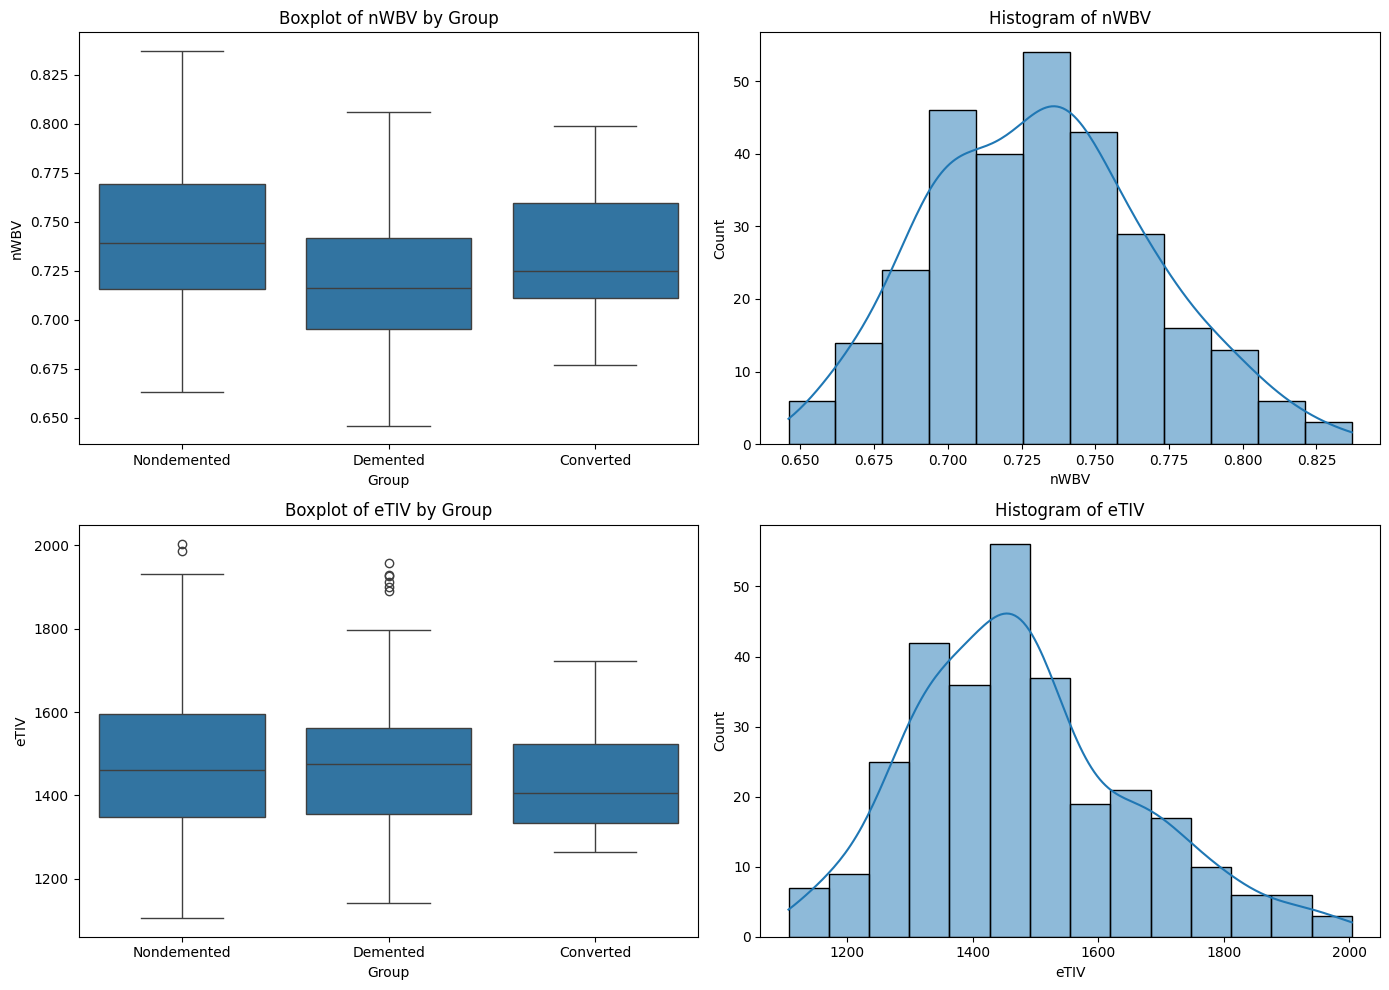

In [49]:
# Visualize nWBV and eTIV distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Row 1: Boxplot of nWBV by Group, and Histogram of nWBV
sns.boxplot(ax=axes[0, 0], x='Group', y='nWBV', data=data)
axes[0, 0].set_title('Boxplot of nWBV by Group')
axes[0, 0].set_xlabel('Group')
axes[0, 0].set_ylabel('nWBV')

sns.histplot(ax=axes[0, 1], x='nWBV', kde=True, data=data)
axes[0, 1].set_title('Histogram of nWBV')
axes[0, 1].set_xlabel('nWBV')
axes[0, 1].set_ylabel('Count')

# Row 2: Boxplot of eTIV by Group, and Histogram of eTIV
sns.boxplot(ax=axes[1, 0], x='Group', y='eTIV', data=data)
axes[1, 0].set_title('Boxplot of eTIV by Group')
axes[1, 0].set_xlabel('Group')
axes[1, 0].set_ylabel('eTIV')

sns.histplot(ax=axes[1, 1], x='eTIV', kde=True, data=data)
axes[1, 1].set_title('Histogram of eTIV')
axes[1, 1].set_xlabel('eTIV')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#Mixed Effect ANOVA

##Normalized Whole Brain Volume

Dependent varibale: Normalized whole brain volume \\
Within subject factor: Visit \\
Between subject factor: Group

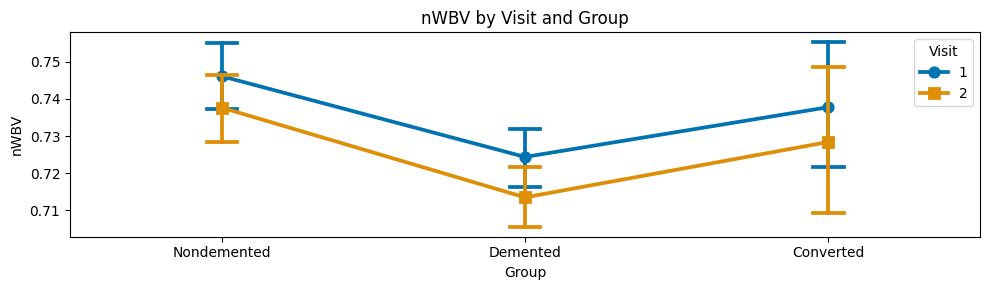

In [50]:
# Create an interaction plot for nWBV across visits for each group
plt.figure(figsize=(10, 3))

sns.pointplot(data=data, x='Group', y='nWBV', hue='Visit', markers=["o", 's'], capsize=.1, palette="colorblind")

plt.title('nWBV by Visit and Group')
plt.xlabel('Group')
plt.ylabel('nWBV')
plt.legend(title='Visit')

plt.tight_layout()
plt.show()

In [51]:
# Perform mixed effect ANOVA for nWBV
results = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID Integer', data=data)
pg.print_table(results)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [52]:
# mauchly's test of spericity
pg.sphericity(data=data, dv='nWBV', subject='Subject ID Integer', within='Visit')[-1]

1.0

In [53]:
# test of normality
pg.normality(data=data, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
1,0.990075,0.372060,True
2,0.989654,0.366703,True


In [54]:
# test of homogenenity
levene_test = pg.homoscedasticity(data, dv='nWBV', group='Group', method='levene')
print(levene_test)

               W     pval  equal_var
levene  0.948773  0.38841       True


##Estimated Total Intracranial Volume

Dependent varibale: Estimated total intracranial volume \\
Within subject factor: Visit \\
Between subject factor: Group

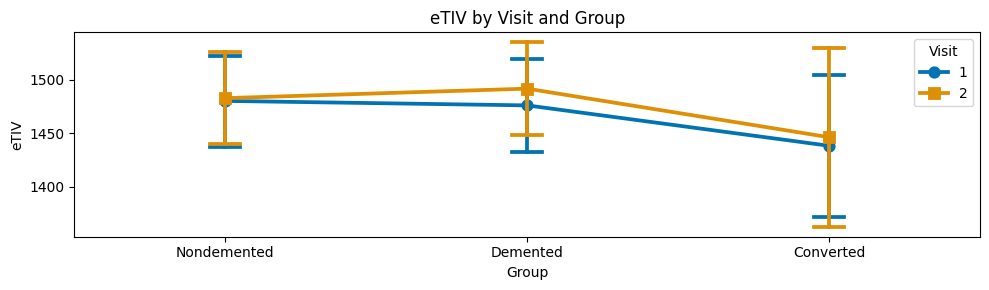

In [55]:
# Create an interaction plot for eTIV across visits for each group
plt.figure(figsize=(10, 3))

sns.pointplot(data=data, x='Group', y='eTIV', hue='Visit', markers=["o", 's'], capsize=.1, palette="colorblind")

plt.title('eTIV by Visit and Group')
plt.xlabel('Group')
plt.ylabel('eTIV')
plt.legend(title='Visit')

plt.tight_layout()
plt.show()

In [56]:
# Perform mixed effect ANOVA for eTIV
results = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID Integer', data=data)
pg.print_table(results)


ANOVA SUMMARY

Source              SS    DF1    DF2         MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  ---------  -----  -------  -----  -------
Group        37424.708      2    141  18712.354  0.297    0.743  0.004  nan
Visit         5573.920      1    141   5573.920  9.225    0.003  0.061    1.000
Interaction   1004.783      2    141    502.392  0.831    0.438  0.012  nan



In [57]:
# mauchly's test of spericity
pg.sphericity(data=data, dv='eTIV', subject='Subject ID Integer', within='Visit')[-1]

1.0

In [58]:
# test of normality
pg.normality(data=data, dv='eTIV', group='Visit')

,W,pval,normal
Visit,,,
1,0.969209,0.001908,False
2,0.977016,0.015926,False


In [59]:
# test of homogenenity
levene_test = pg.homoscedasticity(data, dv='eTIV', group='Group', method='levene')
print(levene_test)

               W      pval  equal_var
levene  1.290321  0.276752       True


#Sample Size and Power Plots




In [60]:
import statsmodels.stats.power as smp

# Set effect size and significant level
effect_size = 0.7
alpha = 0.05
power = 0.91

# Calculate the power
power_analysis = smp.TTestIndPower()

ss_required = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')
print(ss_required)

45.45073088568012


<Figure size 1000x600 with 0 Axes>

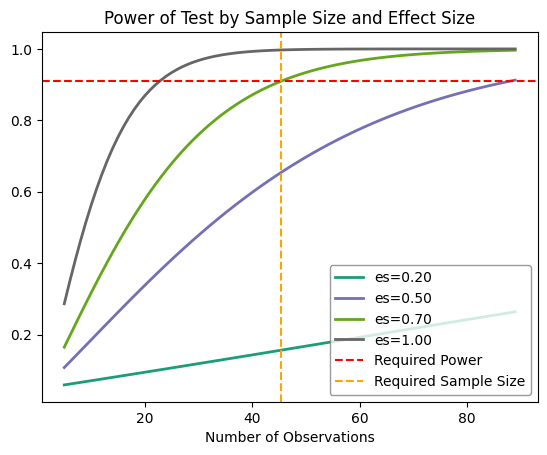

In [61]:
effect_sizes = np.array([0.2, 0.5, 0.7, 1.0])
sample_sizes = np.array(range(5, 90))

# Plot the power plot
plt.figure(figsize=(10, 6))

power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.title('Power of Test by Sample Size and Effect Size')
plt.axhline(y=0.91, color='red', linestyle='--', label='Required Power')
plt.axvline(x=ss_required, color='orange', linestyle='--', label='Required Sample Size')

plt.legend(loc='lower right', frameon=True, edgecolor='grey')

plt.show()